# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# print(mouse_metadata)
# print(study_results)

# Combine the data into a single dataset
# mouse_study_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='left')
mouse_study_df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')
# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
numOfMice = len(mouse_study_df['Mouse ID'].unique())
numOfMice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_by_id_df = mouse_study_df[ mouse_study_df.duplicated(['Mouse ID','Timepoint']) ]

duplicate_mice_by_id = duplicate_mice_by_id_df["Mouse ID"].unique()
duplicate_mice_by_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_by_id_g989_df = mouse_study_df.loc[ mouse_study_df['Mouse ID'] == 'g989' ]
duplicate_mice_by_id_g989_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_df = mouse_study_df[ mouse_study_df['Mouse ID'].isin(duplicate_mice_by_id) == False ]
# clean_mouse_study_df[ clean_mouse_study_df['Mouse ID'] == 'g989' ] 
clean_mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
numOfMice = clean_mouse_study_df['Mouse ID'].value_counts()
len(numOfMice)

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Step 1: group table with each regimen
drug_regimen_df = clean_mouse_study_df.groupby('Drug Regimen')
# drug_regimen_df
# Step 2: calculate mean of the tumor volume
meanOfTumorVolume = drug_regimen_df['Tumor Volume (mm3)'].mean()
# Step 3: calculate median of the 
medianOfTumorVolume = drug_regimen_df['Tumor Volume (mm3)'].median()
# Step 4: calculate variance of the tumor volume
varianceOfTumorVolume = drug_regimen_df['Tumor Volume (mm3)'].var()
# Step 5: calculate standard deviation of the tumor volume
standardDeviationOfTumorVolume = drug_regimen_df['Tumor Volume (mm3)'].std()
# Step 6: calculate SEM of the tumor volume
semOfTumorVolume = drug_regimen_df['Tumor Volume (mm3)'].sem()
# Step 7: assemble the resulting series into a single summary DataFrame
tumor_volume_df = pd.DataFrame({
    "Mean Tumor Volume": meanOfTumorVolume,
    "Median Tumor Volume": medianOfTumorVolume,
    "Tumor Volume Variance": varianceOfTumorVolume,
    "Tumor Volume Std. Dev.": standardDeviationOfTumorVolume,
    "Tumor Volume Std. Err.": semOfTumorVolume
})

tumor_volume_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

drug_regimen_df['Tumor Volume (mm3)'].aggregate(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

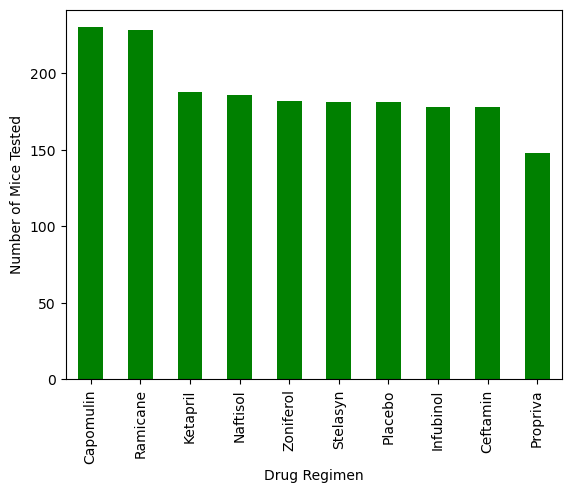

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
totalOfTimepointForEachRegimen = clean_mouse_study_df['Drug Regimen'].value_counts()

plotPandas = totalOfTimepointForEachRegimen.plot.bar(color='green')
plotPandas.set_xlabel("Drug Regimen")
plotPandas.set_ylabel("Number of Mice Tested")

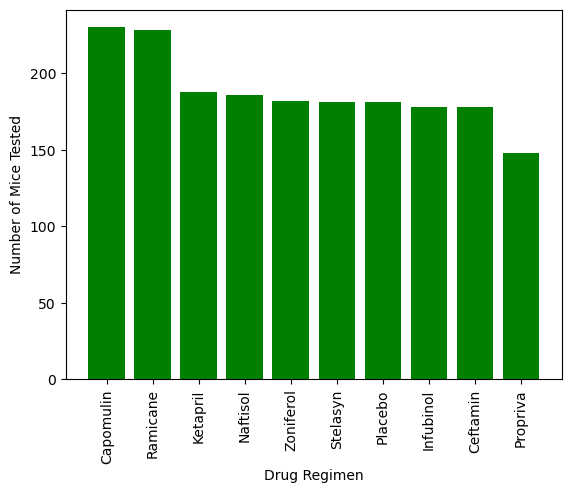

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = totalOfTimepointForEachRegimen.index.values
y_axis = totalOfTimepointForEachRegimen.values

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation='vertical')
plt.bar(x_axis, y_axis, color='green', align="center")
plt.show()

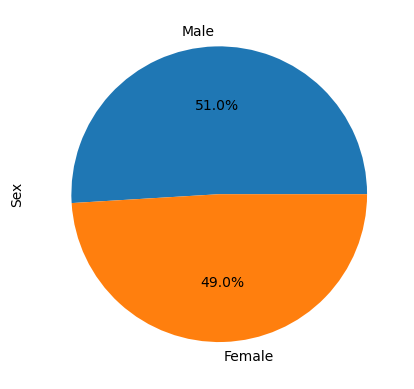

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_series = clean_mouse_study_df['Sex'].value_counts()
gender_series.plot.pie(autopct="%1.1f%%")
plt.show()

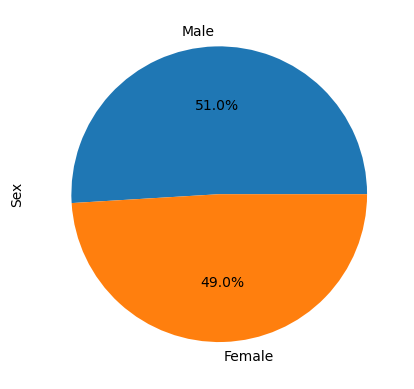

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_series = clean_mouse_study_df['Sex'].value_counts()
gender_keys = gender_series.index.values
gender_values = gender_series.values

plt.pie(gender_values, labels=gender_keys,
        autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

by_mouse_df = clean_mouse_study_df.groupby(['Mouse ID']).max()
by_mouse_df_reset = by_mouse_df.reset_index()

merge_df = by_mouse_df_reset[ ['Mouse ID','Timepoint'] ].merge(clean_mouse_study_df, on=['Mouse ID','Timepoint'], how='left')

def get_outliers(regimen):
    regimen_data_df = merge_df.loc[ merge_df['Drug Regimen'] == regimen ]
    tumor_series = regimen_data_df['Tumor Volume (mm3)']
    quartiles = tumor_series.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)
    outliers = tumor_series.loc[(tumor_series < lower_bound) | (tumor_series > upper_bound)]
    print(f"{regimen}'s potential outliers:{outliers}")
    return outliers

capomulin_outliers = get_outliers('Capomulin')
ramicane_outliers = get_outliers('Ramicane')
infubinol_outliers = get_outliers('Infubinol')
ceftamin_outliers = get_outliers('Ceftamin')

################# For a single regimen test: #################
# Capomulin_df = merge_df.loc[ merge_df['Drug Regimen'] == 'Capomulin' ]
# tumor_series = Capomulin_df['Tumor Volume (mm3)']
# quartiles = tumor_series.quantile([.25,.5,.75])
# print(quartiles)
# quart_first = quartiles[0.25]
# print(quart_first)
# quart_last = quartiles[0.75]
# print(quart_last)
# quart_range = quart_last - quart_first
# print(quart_range)
# lower_bound = quart_first - (1.5 * quart_range)
# upper_bound = quart_last + (1.5 * quart_range)
# outliers = tumor_series.loc[(tumor_series < lower_bound) | (tumor_series > upper_bound)]
# print(f"Capomulin regimen's potential outliers:{outliers}")
# outliers
####################################################################


Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


In [14]:
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = clean_mouse_study_df[ clean_mouse_study_df["Drug Regimen"].isin(drug_list) ]

last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)

series_list = []
 
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    data = np.array([lowerq, upperq, iqr, lower_bound, upper_bound])
    ser = pd.Series(data)
    series_list.append(ser)

    print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    
# series_list


------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 

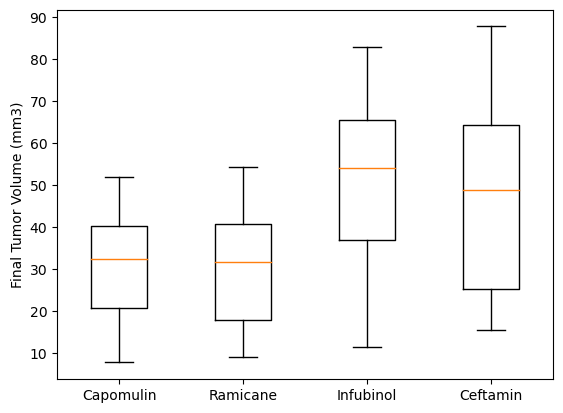

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_dot = dict(markerfacecolor = "red", markersize=10)
plt.boxplot([series_list[0], series_list[1], series_list[2], series_list[3]],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops= red_dot)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

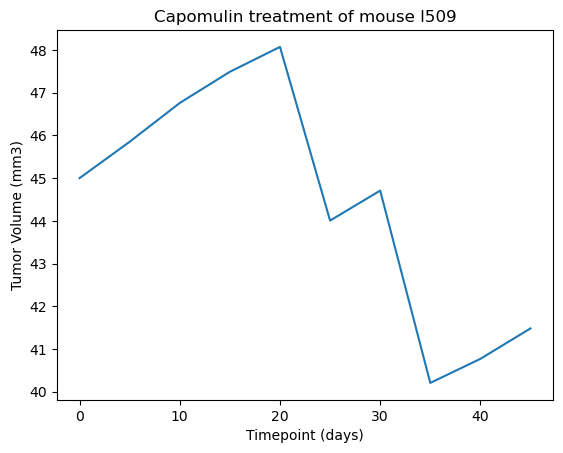

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df = clean_mouse_study_df[ clean_mouse_study_df['Drug Regimen'] == 'Capomulin' ]
mouse_id_b128_df = Capomulin_df.loc[ Capomulin_df['Mouse ID'] == 'l509' ]
x_axis = mouse_id_b128_df['Timepoint']
y_axis = mouse_id_b128_df['Tumor Volume (mm3)']
plt.plot(x_axis, y_axis)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

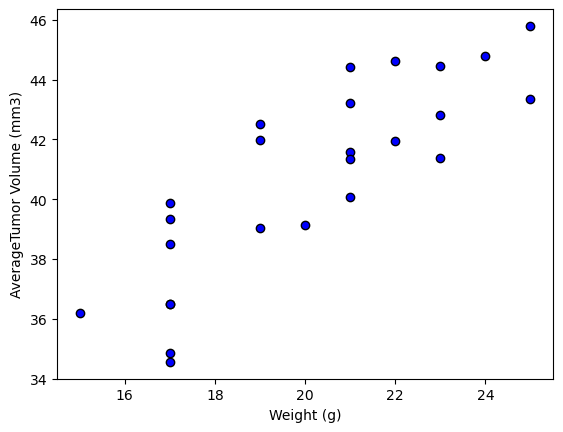

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_df = clean_mouse_study_df[ clean_mouse_study_df['Drug Regimen'] == 'Capomulin' ]
avg_camulin = Capomulin_df.groupby('Mouse ID').mean()

plt.scatter(avg_camulin['Weight (g)'], avg_camulin['Tumor Volume (mm3)'], marker="o", facecolors="blue", edgecolors="black")
plt.xlabel('Weight (g)')
plt.ylabel('AverageTumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


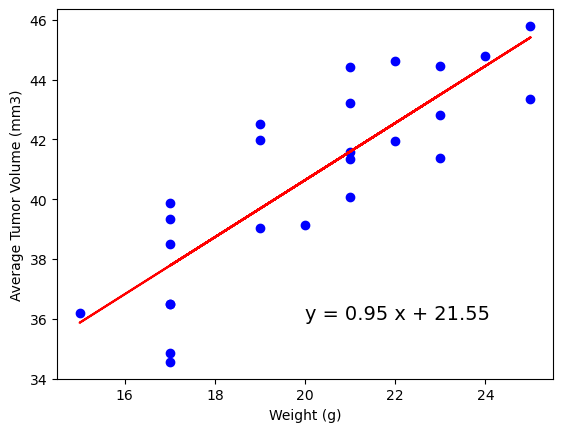

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(avg_camulin['Weight (g)'], avg_camulin['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept,rvalue, pvalue, stderr) = st.linregress(avg_camulin["Weight (g)"],avg_camulin["Tumor Volume (mm3)"])
regress_values = avg_camulin["Weight (g)"]* slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_camulin["Weight (g)"], avg_camulin["Tumor Volume (mm3)"], color = 'blue')
plt.plot(avg_camulin["Weight (g)"], regress_values, color = 'red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()